In [ ]:
import pandas as pd
import zipfile
import pandas as pd

# Unzip the ZIP file
with zipfile.ZipFile('/content/drive/MyDrive/BraTS20 Training Metadata.csv.zip', 'r') as zip_ref:
    zip_ref.extractall()

df = pd.read_csv('BraTS20 Training Metadata.csv')
df.head()

,slice_path,target,volume,slice,label0_pxl_cnt,label1_pxl_cnt,label2_pxl_cnt,background_ratio
0,../input/brats2020-training-data/BraTS2020_tra...,0,41,0,0,0,0,1.0
1,../input/brats2020-training-data/BraTS2020_tra...,0,41,1,0,0,0,1.0
2,../input/brats2020-training-data/BraTS2020_tra...,0,41,2,0,0,0,1.0
3,../input/brats2020-training-data/BraTS2020_tra...,0,41,3,0,0,0,1.0
4,../input/brats2020-training-data/BraTS2020_tra...,0,41,4,0,0,0,1.0


In [ ]:
 new = df[df['background_ratio'] < 0.95]
 print(new.head())

 new['slice_path'][57155]

                                            slice_path  target  volume  slice  \
386  ../input/brats2020-training-data/BraTS2020_tra...       1     135     76   
387  ../input/brats2020-training-data/BraTS2020_tra...       1     135     77   
388  ../input/brats2020-training-data/BraTS2020_tra...       1     135     78   
389  ../input/brats2020-training-data/BraTS2020_tra...       1     135     79   
390  ../input/brats2020-training-data/BraTS2020_tra...       1     135     80   

     label0_pxl_cnt  label1_pxl_cnt  label2_pxl_cnt  background_ratio  
386            1189            1430             429          0.947083  
387            1223            1535             540          0.942743  
388            1267            1590             635          0.939375  
389            1279            1592             823          0.935868  
390            1332            1542             922          0.934097  


'../input/brats2020-training-data/BraTS2020_training_data/content/data/volume_241_slice_115.h5'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/BraTS2020_training_data.zip'

['image', 'mask']


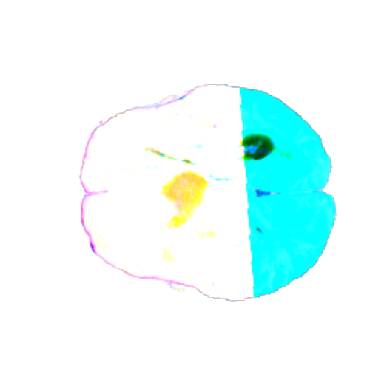

In [ ]:
import matplotlib.pyplot as plt

# Specify the path to your NIfTI file (replace this with your actual file path)
img_path = '/content/drive/MyDrive/BraTS2020/content/data/volume_135_slice_76.h5'
img_1 = '/content/drive/MyDrive/BraTS2020/content/data/volume_241_slice_115.h5'

import h5py

with h5py.File(img_path, 'r') as f:
  keys = list(f.keys())
  print(keys)
  image = f['image'][:]
  plt.imshow(image, cmap='gray')
  plt.axis('off')
  plt.show()

In [ ]:
meta = df.copy()
name_mapping = pd.read_csv('/content/drive/MyDrive/BraTS2020/content/data/name_mapping.csv')
name_mapping.head()

,Grade,BraTS_2017_subject_ID,BraTS_2018_subject_ID,TCGA_TCIA_subject_ID,BraTS_2019_subject_ID,BraTS_2020_subject_ID
0,HGG,Brats17_CBICA_AAB_1,Brats18_CBICA_AAB_1,NaN,BraTS19_CBICA_AAB_1,BraTS20_Training_001
1,HGG,Brats17_CBICA_AAG_1,Brats18_CBICA_AAG_1,NaN,BraTS19_CBICA_AAG_1,BraTS20_Training_002
2,HGG,Brats17_CBICA_AAL_1,Brats18_CBICA_AAL_1,NaN,BraTS19_CBICA_AAL_1,BraTS20_Training_003
3,HGG,Brats17_CBICA_AAP_1,Brats18_CBICA_AAP_1,NaN,BraTS19_CBICA_AAP_1,BraTS20_Training_004
4,HGG,Brats17_CBICA_ABB_1,Brats18_CBICA_ABB_1,NaN,BraTS19_CBICA_ABB_1,BraTS20_Training_005


In [ ]:
name_mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Grade                  369 non-null    object
 1   BraTS_2017_subject_ID  285 non-null    object
 2   BraTS_2018_subject_ID  285 non-null    object
 3   TCGA_TCIA_subject_ID   167 non-null    object
 4   BraTS_2019_subject_ID  335 non-null    object
 5   BraTS_2020_subject_ID  369 non-null    object
dtypes: object(6)
memory usage: 17.4+ KB


In [ ]:
name_mapping['Grade'].value_counts()

#The terms HGG and LGG are commonly used in the context of glioma (a type of brain tumor), specifically referring to the grade of the gliomas.
#HGG: High-Grade Glioma -->Malignant(More aggressive)
#LGG: Low-Grade Glioma -->Often benign(slower progression)

,count
Grade,
HGG,293
LGG,76


In [ ]:
name_mapping['TCGA_TCIA_subject_ID'].describe()

#TCGA: The Cancer Genome Atlas
#TCIA: The Cancer Imaging Archive
#TCGA_TCIA_subject_ID is an identifier that links a subject in both the TCGA and TCIA databases, often indicating that genomic and imaging data for a specific cancer patient are available in both repositories.
#There are only 167 non-null values here

,TCGA_TCIA_subject_ID
count,167
unique,167
top,TCGA-02-0006
freq,1


In [ ]:
survival = pd.read_csv('/content/drive/MyDrive/BraTS2020/content/data/survival_info.csv')
survival.head()
#The Brats20ID refers to the unique identifier assigned to each subject (patient) in the dataset
#This identifier is often used across various data files, including MRI images and clinical data, to associate the subject's imaging data with their corresponding clinical information

,Brats20ID,Age,Survival_days,Extent_of_Resection
0,BraTS20_Training_001,60.463,289,GTR
1,BraTS20_Training_002,52.263,616,GTR
2,BraTS20_Training_003,54.301,464,GTR
3,BraTS20_Training_004,39.068,788,GTR
4,BraTS20_Training_005,68.493,465,GTR


In [ ]:
survival['Extent_of_Resection'].value_counts()
#Extent of resection (EOR) describes the proportion of the tumor that was successfully removed during surgery

#GTR --> Entire visible tumor was successfully removed during surgery
#STR --> Significant portion of the tumor was removed, but some portion remains in the brain

,count
Extent_of_Resection,
GTR,119
STR,10


In [ ]:
meta.head()

,slice_path,target,volume,slice,label0_pxl_cnt,label1_pxl_cnt,label2_pxl_cnt,background_ratio
0,../input/brats2020-training-data/BraTS2020_tra...,0,41,0,0,0,0,1.0
1,../input/brats2020-training-data/BraTS2020_tra...,0,41,1,0,0,0,1.0
2,../input/brats2020-training-data/BraTS2020_tra...,0,41,2,0,0,0,1.0
3,../input/brats2020-training-data/BraTS2020_tra...,0,41,3,0,0,0,1.0
4,../input/brats2020-training-data/BraTS2020_tra...,0,41,4,0,0,0,1.0


In [ ]:
meta['volume'].describe()

#These numerical values typically represent the number of tumor-associated voxels in each 3D volume series, usually following a tumor segmentation process

,volume
count,57195.000000
mean,185.000000
std,106.521665
min,1.000000
25%,93.000000
50%,185.000000
75%,277.000000
max,369.000000


In [ ]:
meta['label0_pxl_cnt'].describe()

,label0_pxl_cnt
count,57195.000000
mean,142.704712
std,418.450734
min,0.000000
25%,0.000000
50%,0.000000
75%,8.000000
max,4214.000000


In [ ]:
import pickle

meta.to_pickle('/content/drive/MyDrive/meta.pkl')
name_mapping.to_pickle('/content/drive/MyDrive/name_mapping.pkl')
survival.to_pickle('/content/drive/MyDrive/survival.pkl')


In [16]:
!git clone https://github.com/Vishnu-MLOps/BraTS2020_Segmentation_Task.git

Cloning into 'BraTS2020_Segmentation_Task'...


In [17]:
%cd BraTS2020_Segmentation_Task
!mv /content/Data_load.ipynb/content/BraTS2020_Segmentation_Task/

/content/BraTS2020_Segmentation_Task
mv: missing destination file operand after '/content/Data_load.ipynb/content/BraTS2020_Segmentation_Task/'
Try 'mv --help' for more information.


In [19]:
!git config --global user.email "vishnuharshan11@gmail.com"
!git config --global user.name "Vishnu-MLOps"


In [28]:
!ls /content/drive/MyDrive/Colab Notebooks/


ls: cannot access '/content/drive/MyDrive/Colab': No such file or directory
ls: cannot access 'Notebooks/': No such file or directory


In [29]:
!ls "/content/drive/MyDrive/Colab Notebooks/Data_load.ipynb"


'Copy of Autoencoder.ipynb'  'Copy of metrial.ipynb'   Untitled1.ipynb
'Copy of CV1.ipynb'	      Data_load.ipynb


In [31]:
!mv "/content/drive/MyDrive/Colab Notebooks/Data_load.ipynb" /content/BraTS2020_Segmentation_Task/
!ls /content/


 BraTS2020_Segmentation_Task  'BraTS20 Training Metadata.csv'   drive   sample_data


In [33]:
!find /content/drive/MyDrive/ -name "Data_load.ipynb"



In [20]:
!git add Data_load.ipynb
!git commit -m "Added Data loader notebook"
!git push origin main

fatal: pathspec 'Data_load.ipynb' did not match any files
On branch main

Initial commit

nothing to commit (create/copy files and use "git add" to track)
error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/Vishnu-MLOps/BraTS2020_Segmentation_Task.git'
